# List generation

In [38]:
import json
import random
import heapq

random.seed(0)

# Creates a list of size len, returns unique random numbers
def random_list(len):
  arr = random.sample(range(0, 15000), len)
  return arr

# Creates a list where all elements are at most k positions away from correct pos
# Uses a min heap
def nearly_sorted_list(len, k):
  arr = random.sample(range(0, 15000), len)
  pq = []
  # Push first k elements
  for i in range(k):
    heapq.heappush(pq, arr[i])
  i = k
  index = 0
  while i < len:
    heapq.heappush(pq, arr[i])
    # Size becomes k+1, pop and add min element in index pos
    arr[index] = heapq.heappop(pq)
    i += 1
    index += 1

  # Put the rest of the elements in array
  while pq:
    arr[index] = heapq.heappop(pq)
    index += 1
  return arr

# Creates a reversely sorted list with unique numbers
def reverse_list(len):
  arr = random.sample(range(0, 15000), len)
  arr.sort()
  arr.reverse()
  return arr

# Creates a list of size len, includes logic for heavy duplicates
def heavy_duplicate_list(len):
  if len <= 10:
    arr = [random.randint(1, 3) for _ in range(len)]
  elif len <=  100:
    arr = [random.randint(1, 10) for _ in range(len)]
  elif len <= 1000:
    arr = [random.randint(1, 100) for _ in range(len)]
  else:
    arr = [random.randint(1,500) for _ in range(len)]
  return arr

x = random_list(10)
print(x)
x = heavy_duplicate_list(10)
print(x)
x = reverse_list(10)
print(x)
x = nearly_sorted_list(10, 2)
print(x)

[13835, 6311, 12418, 14585, 6890, 663, 4242, 8376, 7961, 6634]
[2, 2, 2, 3, 1, 3, 1, 2, 1, 1]
[14905, 14781, 13274, 13097, 11553, 10131, 9861, 8725, 4104, 2407]
[1618, 1208, 5081, 11957, 11206, 5409, 7735, 9171, 13934, 14726]


# HeapSort

In [39]:
import time # track exec time
import random

# To heapify a subtree rooted with node i
def heapify(arr, n, i, metrics):
    # count the call
    metrics["recursive_calls"] += 1

    # Initialize largest as root
    largest = i

    # left index = 2*i + 1
    l = 2 * i + 1

    # right index = 2*i + 2
    r = 2 * i + 2

    # If left child is larger than root
    """
    if l < n and arr[l] > arr[largest]:
        largest = l
    """
    if l < n:
        metrics["comparisons"] += 1
        if arr[l] > arr[largest]:
            largest = l

    # If right child is larger than largest so far
    """
    if r < n and arr[r] > arr[largest]:
        largest = r
    """
    if r < n:
        metrics["comparisons"] += 1
        if arr[r] > arr[largest]:
            largest = r

    # If largest is not root (swap and recurse)
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        metrics["swaps"] += 1

        # Recursively heapify the affected sub-tree
        heapify(arr, n, largest, metrics)

# Main function to do heap sort
def heapSort(arr):
    metrics = {
        "comparisons": 0,
        "swaps": 0,
        "recursive_calls": 0,
        "execution_time": 0
    }

    # Start the timer
    start_time = time.perf_counter()
    n = len(arr)

    # Build heap (rearrange vector)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, metrics)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):

        # Move current root to end
        arr[0], arr[i] = arr[i], arr[0]

        # Count it as a swap
        metrics["swaps"] += 1

        # Call max heapify on the reduced heap
        heapify(arr, i, 0, metrics)

    # End the timer
    end_time = time.perf_counter()
    metrics["execution_time"] = end_time - start_time

    return metrics

# Metric Gathering

In [40]:
# Define a dict to store results
results = {
    "random": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "nearly_sorted": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "reverse": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "heavy_duplicate": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] }
}

if __name__ == "__main__":
  # Loop 6 times, list sizes in increments of 2500
  for i in range(6):

    # Create all lists
    rand_li = random_list((i + 1) * 2500)
    heavy_dupe_li = heavy_duplicate_list((i + 1) * 2500)
    rev_li = reverse_list((i + 1) * 2500)
    near_li = nearly_sorted_list((i + 1) * 2500, 2)

    # Run all lists through sorting algorithm

    # HeapSort, store in main metrics dict
    metrics = {
        "random": heapSort(rand_li),
        "nearly_sorted": heapSort(near_li),
        "reverse": heapSort(rev_li),
        "heavy_duplicate": heapSort(heavy_dupe_li)
    }

    # Push results from metrics dict to results dict
    for key in metrics:
      results[key]["sizes"].append((i + 1) * 2500)
      results[key]["comparisons"].append(metrics[key]["comparisons"])
      results[key]["swaps"].append(metrics[key]["swaps"])
      results[key]["recursive_calls"].append(metrics[key]["recursive_calls"])
      results[key]["execution_time"].append(metrics[key]["execution_time"])

  #test the dict
  import json
  print(json.dumps(results, indent=4))

{
    "random": {
        "sizes": [
            2500,
            5000,
            7500,
            10000,
            12500,
            15000
        ],
        "comparisons": [
            48796,
            107656,
            170221,
            235502,
            302431,
            370426
        ],
        "swaps": [
            26020,
            57059,
            89996,
            124236,
            159322,
            194805
        ],
        "recursive_calls": [
            27270,
            59559,
            93746,
            129236,
            165572,
            202305
        ],
        "execution_time": [
            0.007563999970443547,
            0.016581299947574735,
            0.026260899961926043,
            0.03657910006586462,
            0.0467544998973608,
            0.05744619993492961
        ]
    },
    "nearly_sorted": {
        "sizes": [
            2500,
            5000,
            7500,
            10000,
            12500,
        

# Graphs

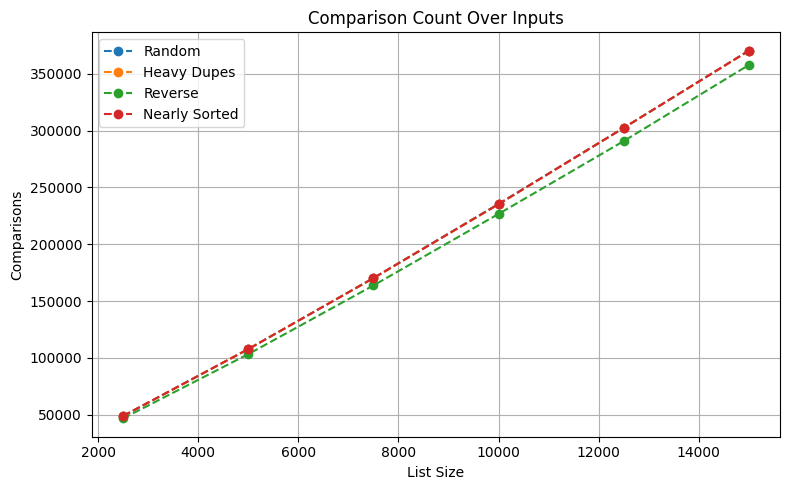

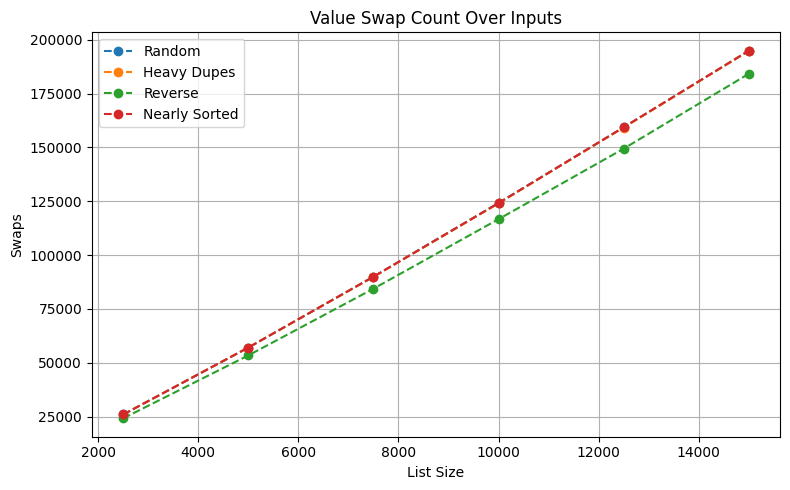

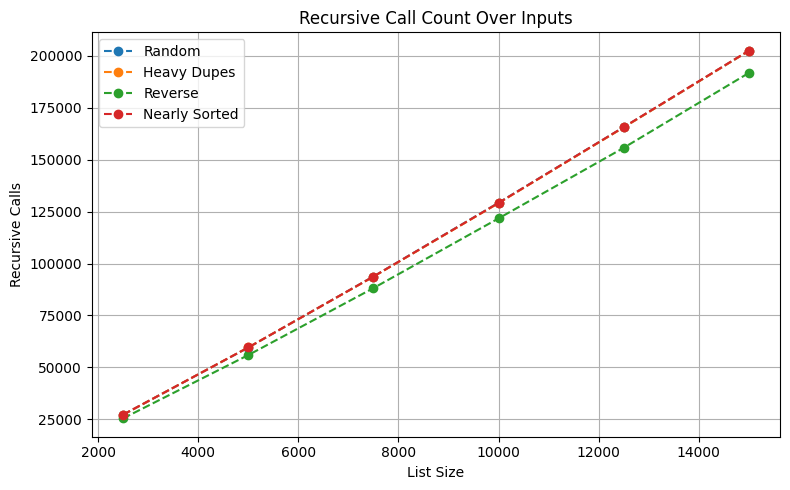

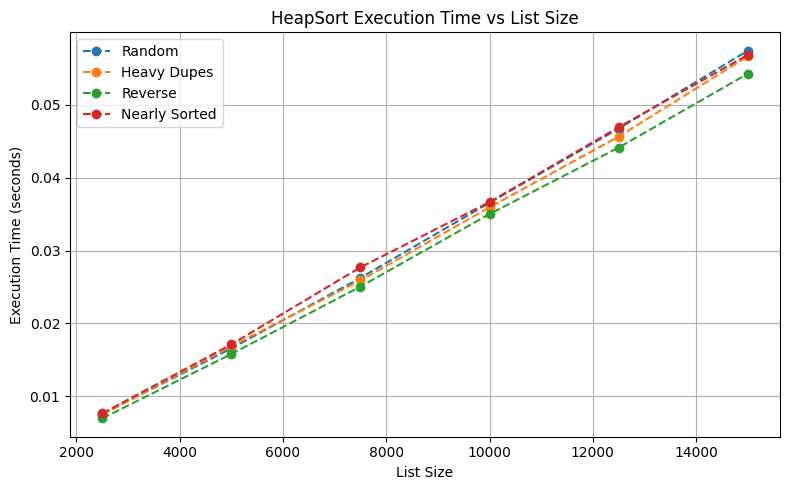

In [41]:
import matplotlib.pyplot as plt

# Map keys to legend names
list_types = {
    "random": "Random",
    "heavy_duplicate": "Heavy Dupes",
    "reverse": "Reverse",
    "nearly_sorted": "Nearly Sorted"
}

# Size x Comparisons
plt.figure(figsize=(8,5))   # Make sure graph big enough
# Loop through each list type and plot requested metric, assign label from list_types
for key, label in list_types.items():
    plt.plot(results[key]["sizes"], results[key]["comparisons"], label=label, marker="o", linestyle="--")

plt.title("Comparison Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Comparisons")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Swaps
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(results[key]["sizes"], results[key]["swaps"], label=label, marker="o", linestyle="--")

plt.title("Value Swap Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Swaps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Calls
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(results[key]["sizes"], results[key]["recursive_calls"], label=label, marker="o", linestyle="--")

plt.title("Recursive Call Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Recursive Calls")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Time
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(results[key]["sizes"], results[key]["execution_time"], label=label, marker="o", linestyle="--")

plt.title("HeapSort Execution Time vs List Size")
plt.xlabel("List Size")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
